# Homework 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

*The two types of alternative ETF investments referenced in this article are Alternative Asset Classes and Alternative Strategies. An alternative asset class is simply an asset class that doesn't fall into the traditional equity or fixed income categories. Examples of this include illiquid investments such as Real Estate or Private Equity. Alternative assets typically have different regulations and fee-structures.*

*An alternative strategy is just a strategy that uses unconventional approaches to generating returns, such as by using shorting or leverage, or by targeting specific risk profiles, trading frequencies, or event based investing.*

## 2. Hedge Funds.

a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

*The main allure of hedge funds was their ability to 'deliver absolute returns in varied market conditions'. In other words, hedge funds are attractive due to their high returns and low market-related risk.*

b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

*Indirectly investing in hedge funds through an ETF greatly reduces both the illiquidity and the expenses involved. This also reduces the idiosyncratic risk of exposure to a single hedge fund.*

## 3. The Benchmarks

a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

*HFRI aggregates the performance of hedge funds with a certain AUM, so in some sense it provides a broad proxy of hedge fund performance in general. HFRI itself is simply a survey of hedge funds. The MLFM targets a high correlation to the HFRI through a linear factor decomposition, and the MLFM-ES alters the MLFM by only including tradable assets. By only including tradable assets, MLFM-ES allows HDG to track its performance as the target. HDG is then ProShares' ETF that serves as the implementation meant to most effectively/efficiently track MLFM-ES.*

b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

*The MLFM (as of 2013) has tracked HFRI with ~90% correlation.*

c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

*The MLFM has its largest loading in 3-Month T-Bills.*

d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

*First, on slide 21 we can see that the MLFM is much more correlated to the Barclays US Aggregate, which could certainly be a consideration for investors. Apart from that, the MLFM simply replicates the risk (on average) taken on by hedge funds in the HRFI index. The purpose of a hedge fund is to generate alpha, and by using simple risk-based replication MLFM may not fully encompass the attractiveness of hedge funds. We saw that these trackers have heavy 3-Month T-Bill loadings, which help them track the risk profile of HFRI, but may drag on returns.*

*It is also a replication based on lagging regressions, which could mean the exposures are outdated.*

## 4. The HDG Product

a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

*HDG attempts to track MLFM-ES, and does so with a small tracking error. The MLFM-ES, in turn, attempts to track the MLFM but only using tradable assets. It also has a low tracking error.*

b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

*HDG could still be valuable due to its diversification benefits, which is outlined in their slide that shows the typical 60/40 portfolio can get massive risk reduction with the inclusion of HDG. Of course, any could replicate this risk profile, but HDG provides a simple, cost-effective option.*

c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

*For HDG, we would have $\frac{(10-1)\%}{20\%}=0.45$ and for the hedge fund itself we would have $\frac{(10-2-2)\%}{20\%}=0.30$. Perhaps this difference in fees makes HDG an attractive option, particularly if it is the "hedge fund beta" that is what investors truly value.*

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Sep 2024`.

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import hw2_helper as hwh

hf_series = pd.read_excel('proshares_analysis_data.xlsx',sheet_name='hedge_fund_series',index_col=0)
merrill_factors = pd.read_excel('proshares_analysis_data.xlsx',sheet_name='merrill_factors',index_col=0)
other_data = pd.read_excel('proshares_analysis_data.xlsx',sheet_name='other_data',index_col=0)

In [2]:
hwh.stats(hf_series)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
mean,0.048295,0.036286,0.034605,0.024812,0.025653
std,0.059476,0.056136,0.055980,0.058408,0.050009
sharpe,0.812004,0.646398,0.618172,0.424805,0.512971


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [3]:
hwh.stats_tail_risk(hf_series)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
skew,-0.963318,-0.265394,-0.251279,-0.254201,-0.434775
kurt,5.763074,1.63158,1.595863,1.75925,1.605934
VaR,-0.024293,-0.028189,-0.028095,-0.030932,-0.017895
CVaR,-0.037478,-0.035857,-0.035816,-0.037575,-0.032695
MDD,-0.115473,-0.124302,-0.124388,-0.14072,-0.137716
Max Date,2019-12-31,2021-06-30,2021-06-30,2021-06-30,2021-06-30
Min Date,2020-03-31,2022-09-30,2022-09-30,2022-09-30,2022-09-30
Recovery Date,2020-08-31,2024-02-29,2024-02-29,2024-07-31,2024-02-29
Recovery Period,153,517,517,670,517


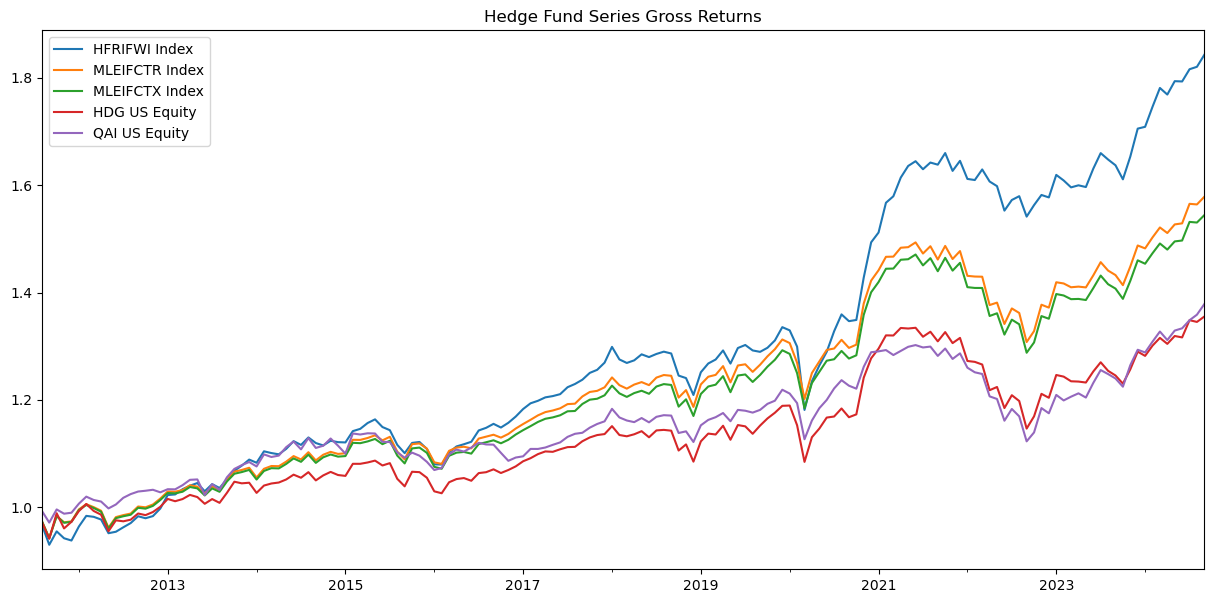

In [4]:
(hf_series + 1).cumprod().plot(figsize=(15, 7), title='Hedge Fund Series Gross Returns'); plt.show()

## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [6]:
x = sm.add_constant(merrill_factors['SPY US Equity'])

regression_stats = pd.DataFrame(index = ['$B^{SPY}$','Treynor','IR'],columns = hf_series.columns)

for hf in hf_series.columns:
    
    y = hf_series[hf]
    
    model = sm.OLS(y,x).fit()
    
    beta = model.params.iloc[1]
    treynor = 12 * y.mean() / beta
    ir = np.sqrt(12) * model.params.iloc[0] / model.resid.std()
    
    regression_stats[hf] = pd.Series([beta,treynor,ir],index = ['$B^{SPY}$','Treynor','IR'])

regression_stats.round(3)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
$B^{SPY}$,0.346,0.343,0.342,0.352,0.298
Treynor,0.140,0.106,0.101,0.070,0.086
IR,-0.036,-0.491,-0.550,-0.896,-0.676


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

__*(a)*__ *On average, these hedge fund series have around a 30 to 40% exposure to SPY as shown by their respective $\beta^{SPY}$. The Treynor Ratio, which measures the level of returns per unit of market risk (proxied by SPY), ranged from ~0.07 to ~0.14, while the mean return of SPY itself was close to 0.14. This seems to indicate that these hedge fund strategies underperformed even relative to the level of risk that was taken on. Lastly, the information ratio of all of these strategies was negative, which reflects their negative $\alpha$. In these regressions, $\alpha$ shows the hedge fund returns that could not be explained by the market. It seems that hedge funds have performed poorly over the past few years.*

__*(b)*__ *Between HDG and QAI there are some notable differences. First, QAI has slightly less exposure to market risk than does HDG, with their difference in betas at ~0.05. As an investor who may be attracted to hedge funds due to their diversification benefits, this difference could be quite meaningful. Secondly, even proportional to the level of market risk, QAI has higher returns.*

__*(c)*__ *Although HDG lags behind both HFRI and the ML series in terms of performance, both it and the ML series generally capture the most notable properties of HFRI. The level of market risk is quite similar to HFRI, which, as discussed by the case, is a driving factor of hedge fund investing. Again, these ETF returns are significantly lower than HFRI which could be a deterrent to potential investors.*

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

C:\Users\Nick\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


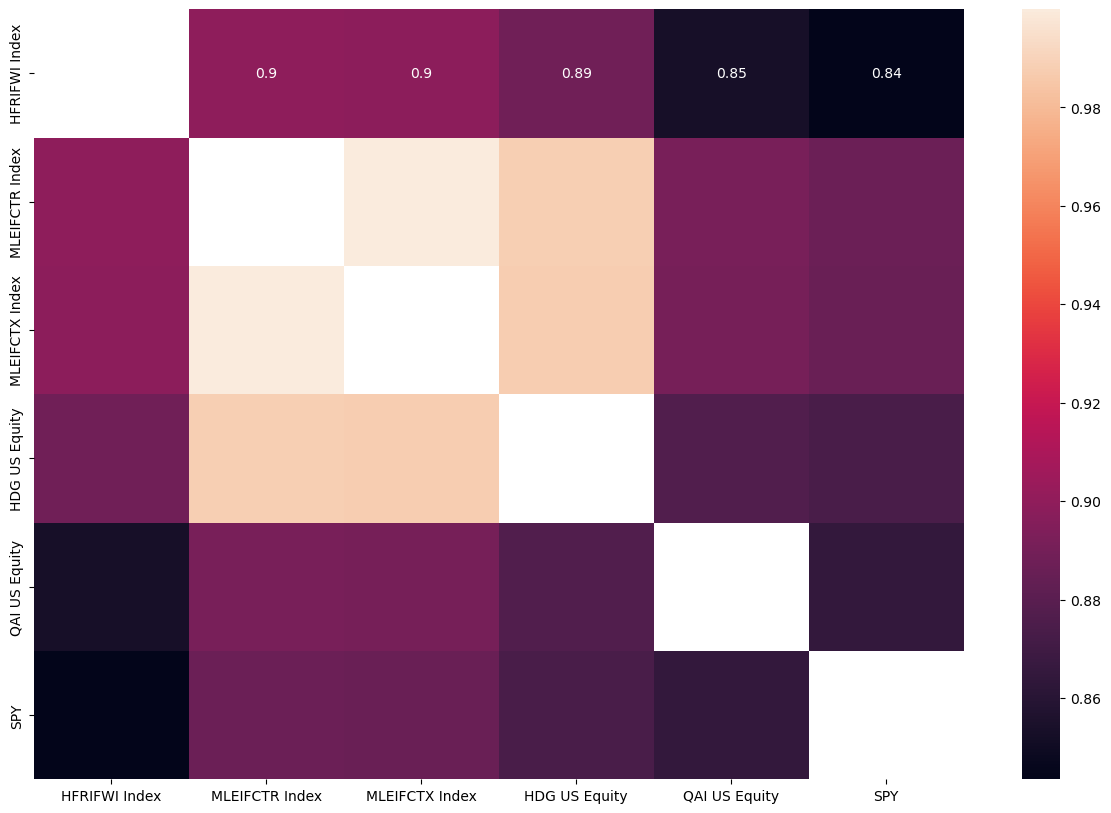

In [7]:
corr = hf_series.assign(SPY = merrill_factors['SPY US Equity']).corr()
np.fill_diagonal(corr.values,np.nan)
plt.figure(figsize=(15, 10)); sns.heatmap(corr, annot=True); plt.show()

*QAI has the lowest correlations to the other assets, while the ML series have the highest correlations. The HDG does a great job of tracking the MLEIFCTR and MLEIFCTX.*

In [8]:
maxpair = corr.stack().idxmax()
maxvalue = corr.stack().max()
minpair = corr.stack().idxmin()
minvalue = corr.stack().min()

print(f'The maximum correlation is between {maxpair[0]} and {maxpair[1]}: {round(maxvalue,4)}.')
print(f'The minimum correlation is between {minpair[0]} and {minpair[1]}: {round(minvalue,4)}.')

The maximum correlation is between MLEIFCTR Index and MLEIFCTX Index: 0.9999.
The minimum correlation is between HFRIFWI Index and SPY: 0.8435.


## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.

b. Are the betas realistic position sizes, or do they require huge long-short positions?

c. Report the R-squared.

d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

__(a)__

In [9]:
y = hf_series[['HFRIFWI Index']]
x = sm.add_constant(merrill_factors)

replication_model = sm.OLS(y,x).fit()

replication_stats = hwh.stats_OLS(replication_model,y,x).round(3)
replication_stats

,HFRIFWI Index
const,0.001
SPY US Equity,0.036
USGG3M Index,0.146
EEM US Equity,0.082
EFA US Equity,0.085
EUO US Equity,0.029
IWM US Equity,0.145


__*(b)*__ Whether these betas represent realistic position sizes is dependent on their relative sizing (and signs). In this case, we seem to have reasonable position sizes.

__(c)__

In [10]:
print(f'R-Squared: {round(replication_model.rsquared,2)}')

R-Squared: 0.84


__(d)__

In [11]:
print(f'The volatility of the tracking error is {round(replication_model.resid.std()*np.sqrt(12),4)}')

The volatility of the tracking error is 0.0238


## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [12]:
t = 60
n = len(hf_series['HFRIFWI Index'])

data = hf_series[['HFRIFWI Index']].copy()
data['Replication'] = np.nan

for i in range(t, n):
    
    y = hf_series['HFRIFWI Index'].iloc[i - 60:i]
    x = sm.add_constant(merrill_factors).iloc[i - 60:i]
    
    m = sm.OLS(y,x).fit()
    
    oos_val = sm.add_constant(merrill_factors).iloc[i].to_numpy().reshape((7))

    rep_val = m.predict(oos_val)
    
    data['Replication'].iloc[i] = rep_val

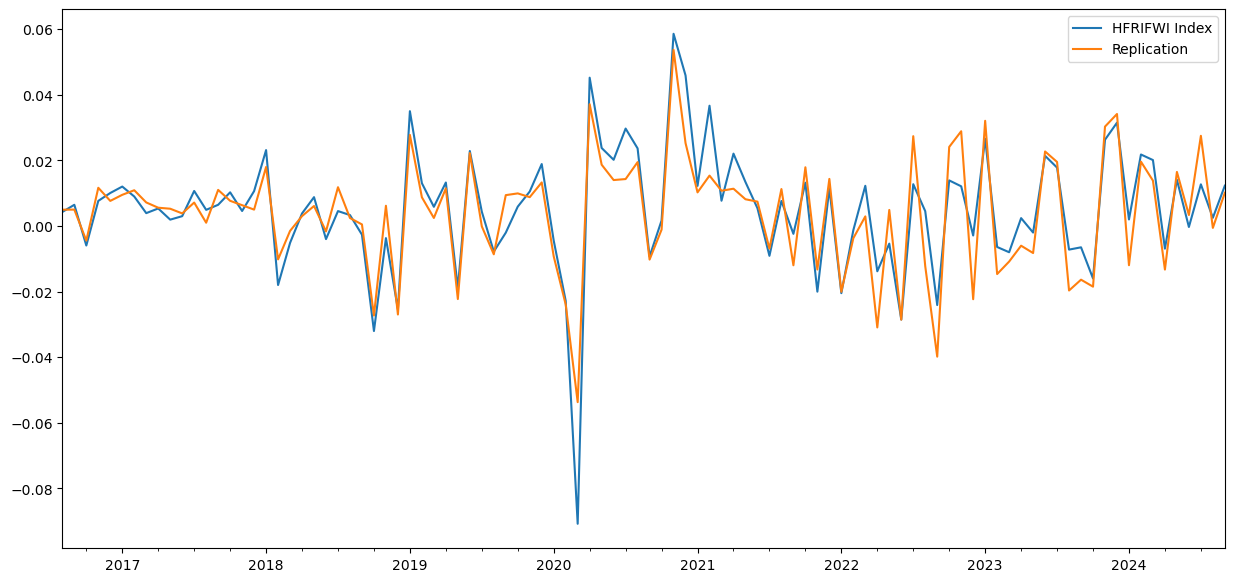

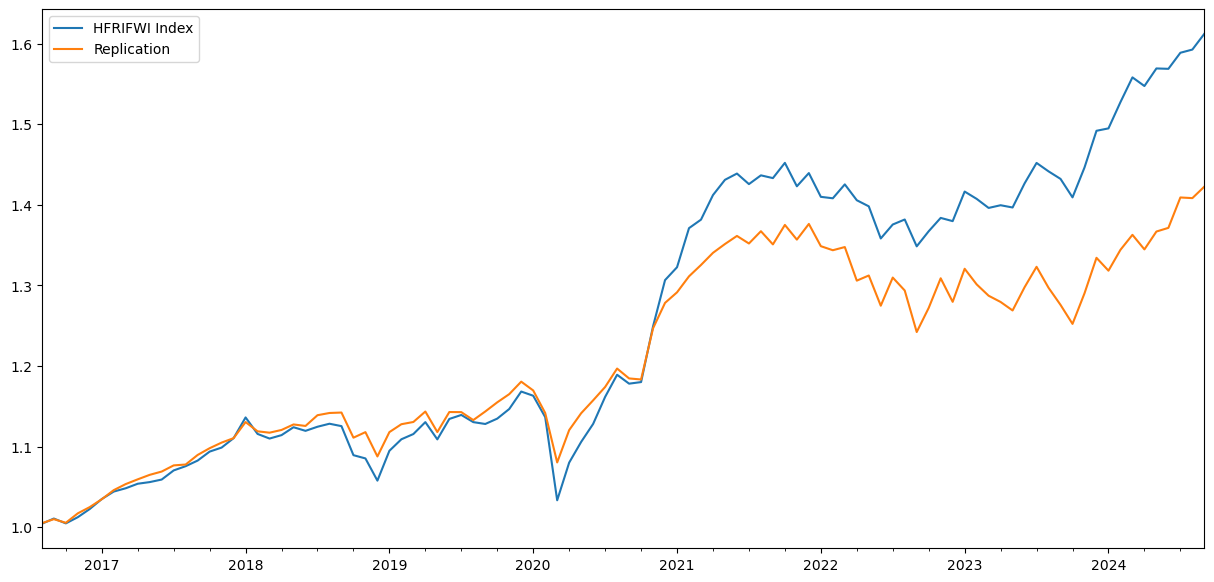

In [13]:
ax = data.dropna().plot(figsize=(15, 7)); (1 + data.dropna()).cumprod().plot(figsize=(15, 7)); plt.show()

In [14]:
# We can simplify by doing the following:

x = sm.add_constant(merrill_factors)
y = hf_series['HFRIFWI Index']

from statsmodels.regression.rolling import RollingOLS
rolling = RollingOLS(y,x,window=60).fit()
rolling_betas = rolling.params
replication_rolling = (rolling_betas.shift() * x).dropna().sum(axis=1)

In [15]:
oos_loss = (data.dropna().diff(axis=1)**2)['Replication'].sum()
oos_mean = data.dropna()['HFRIFWI Index'].mean()
oos_loss_null = ((data.dropna()['HFRIFWI Index'] - oos_mean)**2).sum()

oos_r2 = 1 - oos_loss / oos_loss_null

print(f'The OOS R-Squared of the replication is {round(oos_r2,4)}')

The OOS R-Squared of the replication is 0.7994


In [16]:
data.corr().round(3)

,HFRIFWI Index,Replication
HFRIFWI Index,1.000,0.898
Replication,0.898,1.000


*Our replication portfolio does a decent job of tracking the index returns, as shown by the charts above and the ~90% correlation between the two. However, it is evident that the replication is lagging behind the cumulative returns of HFRIFWI.*

*One important consideration is whether or not we include the intercept in our "replication". On the one hand, it is useful to assess what sort of replication we could create if we had access to the alpha. On the other hand, we know that we can't directly get exposure to the alpha in our replication, so it may also make sense to assess our replication solely based on the betas (which are tradable). These considerations may lead to different choices in fitting the model, as shown below.*

## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

__(a)__

In [17]:
y = hf_series[['HFRIFWI Index']]
x = merrill_factors

replication_model_no_int = sm.OLS(y,x).fit()

# No-intercept model
hwh.stats_OLS(replication_model_no_int,y,x).round(2)

,HFRIFWI Index
SPY US Equity,0.05
USGG3M Index,0.50
EEM US Equity,0.08
EFA US Equity,0.08
EUO US Equity,0.03
IWM US Equity,0.14


*Excluding the intercept term, we find that our weights change quite drastically. We now require a much large exposure to USGG3M, however the rest of our weights are relatively unchanged.*

__(b)__

In [18]:
# No-intercept model mean
round(replication_model_no_int.predict(x).mean(),4)

0.0033

In [19]:
# Intercept model mean (should be equal to the mean of the regressand)
round(replication_model.predict(sm.add_constant(x)).mean(),4)

0.004

In [20]:
# Double check
y.mean().round(4)

HFRIFWI Index    0.004
dtype: float64

*Evidently the mean of the replication model with no intercept is lower than that of HFRIFWI. We do note however, that that the mean of the model that included the intercept is the same as the HFRIFWI __if we include the intercept__. If we do not, then the mean return of our replication is actually less than the no intercept model. Remember that we can trade the factors, but not the alpha.*

__(c)__

In [21]:
print('Correlation of no intercept model to HFRIFWI: ', np.corrcoef(y['HFRIFWI Index'], replication_model_no_int.predict(x))[0][1])
print('Correlation of intercept model to HFRIFWI: ', np.corrcoef(y['HFRIFWI Index'], replication_model.predict(sm.add_constant(x)))[0][1])

Correlation of no intercept model to HFRIFWI:  0.9156937941419587
Correlation of intercept model to HFRIFWI:  0.9163384903623589


*Including an intercept increases our correlation marginally.*

*It seems like ProShares and Merrill Lynch use the no intercept model. From the case study we know they have a large position in US Treasury Bills. This is more aligned with the no intercept model, which has a positive beta of 0.5. In addition, we've found that we barely gain any correlation by including the intercept but we sacrifice a bit of mean return. Conceptually, it makes sense that if we want to replicate the index with the purpose of long-term investments we likely want to replicate the mean as well as the variation. The intercept ensures we are matching the variation in the factors, where we would like to match the overall level.*

***

# 3.  Extensions
<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. 

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

In [22]:
from sklearn.linear_model import LinearRegression

# Model Creation
y = hf_series['HFRIFWI Index']
x = merrill_factors

model_nnls = LinearRegression(fit_intercept=True, positive = True).fit(x,y)

# Display Parameters
nnls_stats = pd.DataFrame(data = model_nnls.intercept_,index = ['const'],columns=['HFRIFWI'])
nnls_stats = pd.concat([nnls_stats, pd.DataFrame(data=model_nnls.coef_,index=x.columns,columns=['HFRIFWI'])])
nnls_stats.round(4)

,HFRIFWI
const,0.0012
SPY US Equity,0.0365
USGG3M Index,0.1463
EEM US Equity,0.0816
EFA US Equity,0.0846
EUO US Equity,0.0288
IWM US Equity,0.1451


<Axes: >

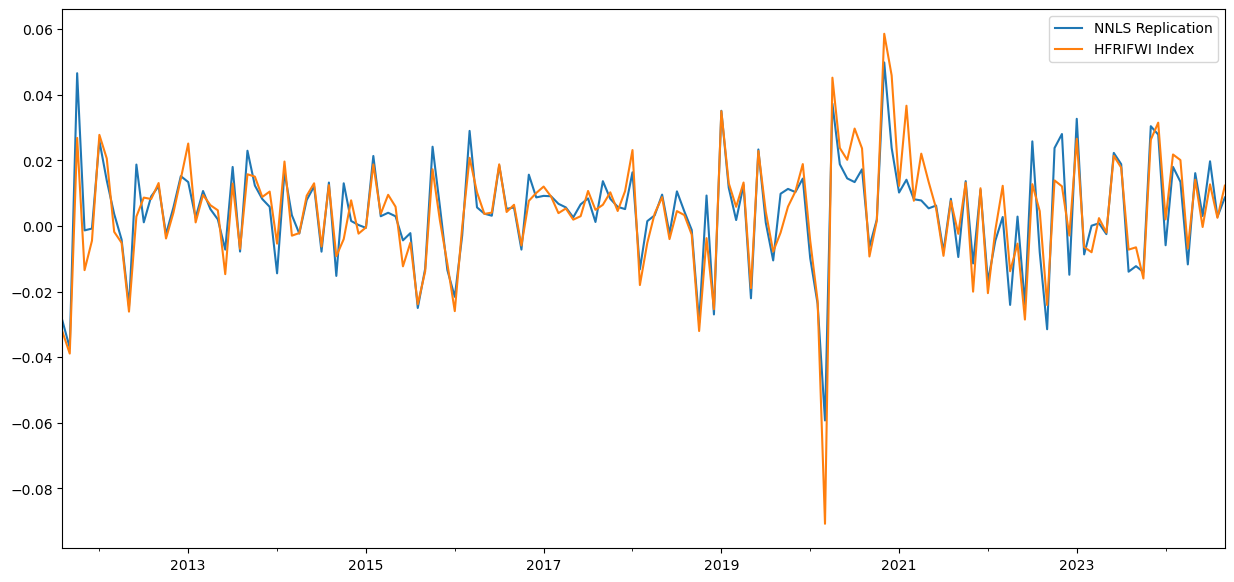

In [23]:
pd.Series(index=x.index, data=model_nnls.predict(x)).plot(figsize=(15, 7), label='NNLS Replication', legend=True); y.plot(legend=True)

## 2. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

In [24]:
y = other_data[['HEFA US Equity']]
x = merrill_factors

hefa_ols_model = sm.OLS(y, sm.add_constant(x), missing='drop').fit()

print(f'R-Squared: {hefa_ols_model.rsquared: .4f}')

# No-intercept model
hwh.stats_OLS(hefa_ols_model,y,x).round(5)

R-Squared:  0.9646


,HEFA US Equity
const,0.00091
SPY US Equity,0.04912
USGG3M Index,-0.06155
EEM US Equity,-0.05769
EFA US Equity,0.93239
EUO US Equity,0.33973
IWM US Equity,-0.00436


*Yes, it does appear such that it could be a currency-hedged version of EFA, as it clearly has a high beta to EFA. This implies that they have quite similar risks, with the difference potentially coming from currency hedges. We also note the very high r-squared value, which indicates a very strong fit.*

In [25]:
y = other_data[['TRVCI Index']]
x = merrill_factors

trvci_ols_model = sm.OLS(y, sm.add_constant(x), missing='drop').fit()

print(f'R-Squared: {trvci_ols_model.rsquared: .4f}')

# No-intercept model
hwh.stats_OLS(trvci_ols_model, y, sm.add_constant(x)).round(5)

R-Squared:  0.7093


,TRVCI Index
const,-0.00157
SPY US Equity,1.97414
USGG3M Index,0.17411
EEM US Equity,-0.05175
EFA US Equity,-0.14499
EUO US Equity,-0.05508
IWM US Equity,-0.24251


*Our factor betas here imply that venture capital returns are best described through US large cap equities (SPY). In particular, we find a very high beta, meaning venture capital might appear to be similar to a levered equities investing style.*

In [38]:
spy_and_tail = pd.concat([other_data[['TAIL US Equity']], merrill_factors['SPY US Equity']], axis=1).dropna()

hwh.stats(spy_and_tail)

,TAIL US Equity,SPY US Equity
mean,-0.074662,0.149755
std,0.113543,0.165130
sharpe,-0.657571,0.906890


In [39]:
hwh.stats_tail_risk(spy_and_tail)

C:\Users\Nick\Desktop\TA\Homework #2\hw2_helper.py:50: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  .idxmax()


,TAIL US Equity,SPY US Equity
skew,1.058871,-0.50314
kurt,3.415815,0.364517
VaR,-0.046425,-0.081143
CVaR,-0.066911,-0.095119
MDD,-0.477637,-0.239271
Max Date,2017-05-31,2021-12-31
Min Date,2024-05-31,2022-09-30
Recovery Date,NaT,2023-12-31
Recovery Period,NaN,457


In [40]:
y = other_data[['TAIL US Equity']]
x = merrill_factors

tail_ols_model = sm.OLS(y, x, missing='drop').fit()

print(f'R-Squared: {tail_ols_model.rsquared: .4f}')

# No-intercept model
hwh.stats_OLS(tail_ols_model, y, x).round(5)

R-Squared:  0.6167


,TAIL US Equity
SPY US Equity,-0.29598
USGG3M Index,0.16284
EEM US Equity,-0.05081
EFA US Equity,-0.21602
EUO US Equity,-0.32980
IWM US Equity,-0.06404


In [41]:
spy_and_tail.corr()

,TAIL US Equity,SPY US Equity
TAIL US Equity,1.000000,-0.713173
SPY US Equity,-0.713173,1.000000


*Taking a look at few notable statistics, I think the data points to no. It certainly does have a more positive skew than does SPY, however the mean return is quite different and the correlation and factor betas indicate very different behaviors.*

## 3. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

*Because they have to continually re-lever in order to track the index at 3x. This means that they have a decay over time and the expected return of holding these ETF to infinity is -100%. As an example:*

*Day 1: SPY is at 100, and closes at 110 (10% up). The 3x ETF is at 100, and closes at 130 (30% up). Day 2: SPY is at 110, and closes at 100 (-9.1% down). The 3x ETF is at 130, and closes at 94.51 (-27.3% down).*

*So, even though SPY is back to where it started, the 3x ETF is down 5.49%. This is because it has to re-lever every day, and so it is buying high and selling low. For example, during the financial crisis when there were many large movements down, we would expect these ETFs to lose a lot of value due to continually having to re-lever. This is also why they have high management fees (UPRO has 0.91% management fee, compared to 0.09% for SPY, or 0.03% for VOO).*

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

In [50]:
spy_and_levered = pd.concat([merrill_factors[['SPY US Equity']], other_data[['UPRO US Equity', 'SPXU US Equity']]], axis=1)

hwh.stats(spy_and_levered)

,SPY US Equity,UPRO US Equity,SPXU US Equity
mean,0.142836,0.364545,-0.442848
std,0.144939,0.449344,0.400800
sharpe,0.985489,0.811283,-1.104912


In [43]:
y = other_data[['UPRO US Equity']]
x = merrill_factors[['SPY US Equity']]

upro_ols_model = sm.OLS(y, x, missing='drop').fit()

print(f'R-Squared: {upro_ols_model.rsquared: .4f}')

# No-intercept model
hwh.stats_OLS(upro_ols_model, y, x).round(5)

R-Squared:  0.9912


,UPRO US Equity
SPY US Equity,3.04885


In [49]:
y = other_data[['SPXU US Equity']]
x = merrill_factors[['SPY US Equity']]

spxu_ols_model = sm.OLS(y, x, missing='drop').fit()

print(f'R-Squared: {spxu_ols_model.rsquared: .4f}')

# No-intercept model
hwh.stats_OLS(spxu_ols_model, y, x).round(5)

R-Squared:  0.9193


,SPXU US Equity
SPY US Equity,-2.67687


<Axes: >

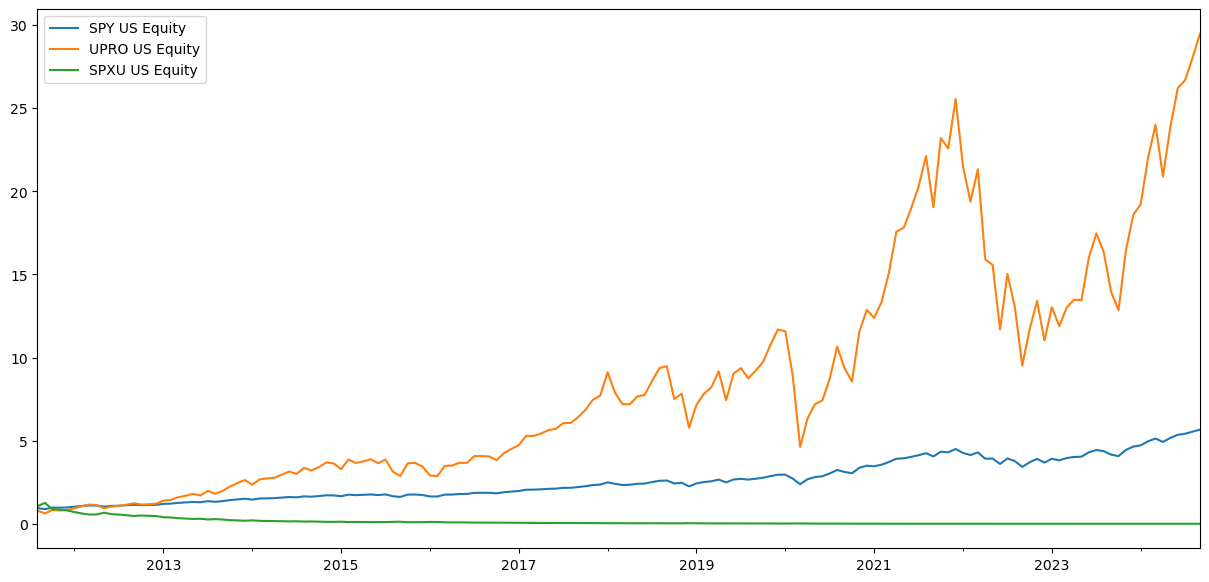

In [48]:
ax = (1 + merrill_factors[['SPY US Equity']]).cumprod().plot(figsize=(15, 7))
(1 + other_data[['UPRO US Equity']]).cumprod().plot(ax=ax)
(1 + other_data[['SPXU US Equity']]).cumprod().plot(ax=ax)

*Evidently yes, the levered ETFs do live up to their names, as they achieve monthly returns very close to +/- 3x that of SPY. Note that technically they seek to do so for daily returns, which could be one reason it is not exactly 3x for monthly returns (shown above). We must note that UPRO doesn't quite reach 3x, and this could be a result of the decay present in these levered ETFs.*

***